In [1]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing & Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Stats (Assumptions)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

# Gradio
import gradio as gr


🏥 Medical Insurance Cost Prediction
📌 Problem Statement

Insurance companies need to accurately predict medical costs to optimize premium pricing and manage financial risk.

🎯 Objective

To build and compare multiple regression models to predict medical insurance charges based on customer features.

In [2]:
# =========================
# 2. READ DATA
# =========================
df = pd.read_excel(r"C:/Users/risha/Downloads/medical_insurance_cost_dataset.xlsx")


In [3]:
df.head()

,age,bmi,children,gender,smoker,region,annual_income,policy_type,pre_existing_disease,hospital_visits_last_year,exercise_hours_per_week,alcohol_consumption_per_week,cholesterol_level,blood_pressure,insurance_charges
0,62,29.67,4,female,no,west,683304.0,standard,no,2,0.2,2.9,191.0,94,14324.52
1,24,24.01,2,male,yes,west,754868.0,premium,no,3,1.4,0.1,192.0,140,21646.69
2,61,20.07,1,female,no,south,345120.0,premium,no,1,3.2,0.9,157.0,125,9001.80
3,29,NaN,3,male,no,west,904875.0,standard,yes,2,-0.4,2.7,204.0,151,12480.09
4,60,31.37,1,female,no,east,267114.0,premium,no,3,3.9,1.6,169.0,145,10039.67


In [4]:
df.tail()

,age,bmi,children,gender,smoker,region,annual_income,policy_type,pre_existing_disease,hospital_visits_last_year,exercise_hours_per_week,alcohol_consumption_per_week,cholesterol_level,blood_pressure,insurance_charges
2995,22,25.58,3,male,no,south,669988.0,standard,yes,5,5.1,1.5,256.0,146,17906.82
2996,26,27.22,0,female,no,east,1599176.0,standard,yes,3,3.0,3.0,271.0,148,14657.42
2997,62,25.82,3,female,no,south,NaN,basic,yes,4,4.9,1.0,242.0,144,16421.03
2998,22,23.75,4,female,yes,north,991376.0,standard,no,1,2.9,-0.3,234.0,106,22505.98
2999,59,28.69,4,female,no,west,1847854.0,basic,no,2,1.9,3.3,197.0,90,14314.77


In [5]:
df.sample(5)

,age,bmi,children,gender,smoker,region,annual_income,policy_type,pre_existing_disease,hospital_visits_last_year,exercise_hours_per_week,alcohol_consumption_per_week,cholesterol_level,blood_pressure,insurance_charges
2194,28,29.26,3,female,no,east,1040720.0,standard,yes,2,0.0,1.0,181.0,93,15797.46
935,43,31.60,3,male,no,east,1143883.0,standard,yes,2,0.5,2.0,178.0,102,17936.93
1840,22,30.70,4,male,no,north,479103.0,premium,yes,1,2.9,1.2,241.0,139,14239.52
2394,49,NaN,4,female,no,south,408222.0,standard,no,1,2.3,2.5,256.0,84,8896.54
890,34,28.44,4,male,no,north,1235603.0,premium,yes,2,7.2,1.9,214.0,135,14819.56


In [6]:
df.shape

(3000, 15)

In [8]:
df.columns

Index(['age', 'bmi', 'children', 'gender', 'smoker', 'region', 'annual_income',
       'policy_type', 'pre_existing_disease', 'hospital_visits_last_year',
       'exercise_hours_per_week', 'alcohol_consumption_per_week',
       'cholesterol_level', 'blood_pressure', 'insurance_charges'],
      dtype='object')

In [10]:
df.dtypes

age                               int64
bmi                             float64
children                          int64
gender                           object
smoker                           object
region                           object
annual_income                   float64
policy_type                      object
pre_existing_disease             object
hospital_visits_last_year         int64
exercise_hours_per_week         float64
alcohol_consumption_per_week    float64
cholesterol_level               float64
blood_pressure                    int64
insurance_charges               float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           3000 non-null   int64  
 1   bmi                           2858 non-null   float64
 2   children                      3000 non-null   int64  
 3   gender                        3000 non-null   object 
 4   smoker                        3000 non-null   object 
 5   region                        3000 non-null   object 
 6   annual_income                 2847 non-null   float64
 7   policy_type                   3000 non-null   object 
 8   pre_existing_disease          3000 non-null   object 
 9   hospital_visits_last_year     3000 non-null   int64  
 10  exercise_hours_per_week       2848 non-null   float64
 11  alcohol_consumption_per_week  3000 non-null   float64
 12  cholesterol_level             2852 non-null   float64
 13  blo

In [12]:
df.describe()

,age,bmi,children,annual_income,hospital_visits_last_year,exercise_hours_per_week,alcohol_consumption_per_week,cholesterol_level,blood_pressure,insurance_charges
count,3000.000000,2858.000000,3000.000000,2.847000e+03,3000.000000,2848.000000,3000.000000,2852.000000,3000.000000,3000.000000
mean,41.158000,27.365394,1.939000,1.110792e+06,2.007000,3.000421,1.968133,213.660589,119.230333,13847.403882
std,13.470394,5.726039,1.421016,5.210714e+05,1.394847,1.447391,1.008486,37.802889,23.194179,7674.518928
min,18.000000,11.900000,0.000000,2.001840e+05,0.000000,-2.200000,-1.500000,150.000000,80.000000,1927.350000
25%,30.000000,23.710000,1.000000,6.624315e+05,1.000000,2.000000,1.300000,181.000000,99.000000,8806.640000
50%,41.000000,27.085000,2.000000,1.101105e+06,2.000000,3.000000,2.000000,213.000000,120.000000,11553.370000
75%,53.000000,30.547500,3.000000,1.580178e+06,3.000000,3.900000,2.700000,246.000000,139.000000,16950.447500
max,64.000000,46.883324,4.000000,1.999981e+06,9.000000,7.800000,5.700000,279.000000,159.000000,48350.323811


In [13]:
df.duplicated().sum()

np.int64(96)

In [14]:
# =========================
# 4. CHECK DUPLICATES, MISSING, OUTLIERS
# =========================

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Missing Values
print(df.isnull().sum())

# Outlier Detection using IQR
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} Outliers:", len(outliers))


Duplicate rows: 96
age                               0
bmi                             142
children                          0
gender                            0
smoker                            0
region                            0
annual_income                   153
policy_type                       0
pre_existing_disease              0
hospital_visits_last_year         0
exercise_hours_per_week         152
alcohol_consumption_per_week      0
cholesterol_level               148
blood_pressure                    0
insurance_charges                 0
dtype: int64
age Outliers: 0
bmi Outliers: 81
children Outliers: 0
annual_income Outliers: 0
hospital_visits_last_year Outliers: 16
exercise_hours_per_week Outliers: 22
alcohol_consumption_per_week Outliers: 17
cholesterol_level Outliers: 0
blood_pressure Outliers: 0
insurance_charges Outliers: 83


In [15]:
# =========================
# 5. CHECK LINEAR REGRESSION ASSUMPTIONS (FIXED)
# =========================

# Select numeric columns except target
X_num = df.select_dtypes(include=np.number).drop(columns=['charges'], errors='ignore')

# Replace inf with NaN
X_num = X_num.replace([np.inf, -np.inf], np.nan)

# Fill missing numeric values (important before VIF)
X_num = X_num.fillna(X_num.median())

# Remove constant columns (zero variance)
X_num = X_num.loc[:, X_num.nunique() > 1]

# VIF Calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                        feature        VIF
1                           bmi  23.935863
7             cholesterol_level  23.557807
8                blood_pressure  21.119106
0                           age   9.593177
3                 annual_income   5.664555
5       exercise_hours_per_week   5.367381
9             insurance_charges   5.251187
6  alcohol_consumption_per_week   4.647710
4     hospital_visits_last_year   3.099442
2                      children   2.839554


In [16]:
# =========================
# 6. DATA CLEANING
# =========================

# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Outlier Capping (IQR)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)



In [19]:
# =========================
# 7. INPUT - OUTPUT SPLIT (FINAL)
# =========================

target_col = "insurance_charges"

X = df.drop(target_col, axis=1)
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2904, 14)
y shape: (2904,)


In [25]:
print("Duplicate rows:", df.duplicated().sum())

# Missing Values
print(df.isnull().sum())

Duplicate rows: 0
age                             0
bmi                             0
children                        0
gender                          0
smoker                          0
region                          0
annual_income                   0
policy_type                     0
pre_existing_disease            0
hospital_visits_last_year       0
exercise_hours_per_week         0
alcohol_consumption_per_week    0
cholesterol_level               0
blood_pressure                  0
insurance_charges               0
dtype: int64


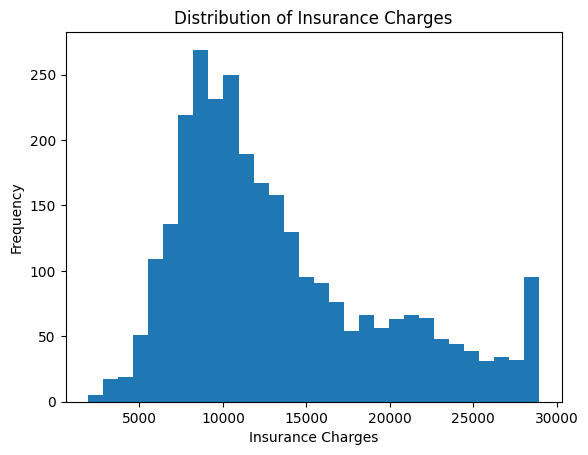

In [32]:
plt.figure()
plt.hist(df['insurance_charges'], bins=30)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Insurance Charges")
plt.ylabel("Frequency")
plt.show()

The distribution of insurance charges is positively skewed, meaning a small number of customers incur significantly higher medical costs. This suggests that high-risk individuals contribute disproportionately to total insurance payouts.

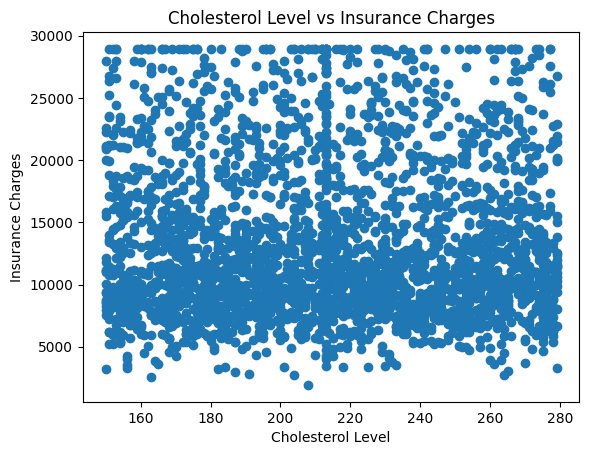

In [33]:
plt.figure()
plt.scatter(df['cholesterol_level'], df['insurance_charges'])
plt.title("Cholesterol Level vs Insurance Charges")
plt.xlabel("Cholesterol Level")
plt.ylabel("Insurance Charges")
plt.show()

The scatter plot shows no strong linear correlation between cholesterol level and insurance charges. While high cholesterol may contribute to health risk, it does not independently explain large variations in insurance costs. This suggests that other variables such as smoking status, age, or pre-existing diseases may have stronger predictive power.

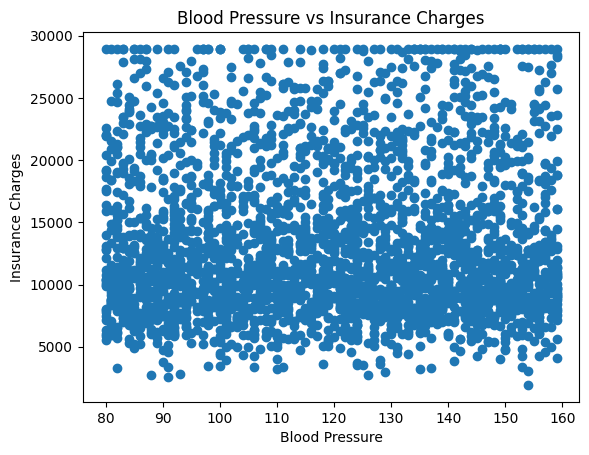

In [34]:
plt.figure()
plt.scatter(df['blood_pressure'], df['insurance_charges'])
plt.title("Blood Pressure vs Insurance Charges")
plt.xlabel("Blood Pressure")
plt.ylabel("Insurance Charges")
plt.show()

The scatter plot suggests a weak direct relationship between blood pressure and insurance charges. While higher blood pressure may contribute to health risk, it does not independently drive large variations in insurance cost. Other variables such as smoking status, pre-existing disease, or cholesterol levels may have stronger influence.

<Figure size 640x480 with 0 Axes>

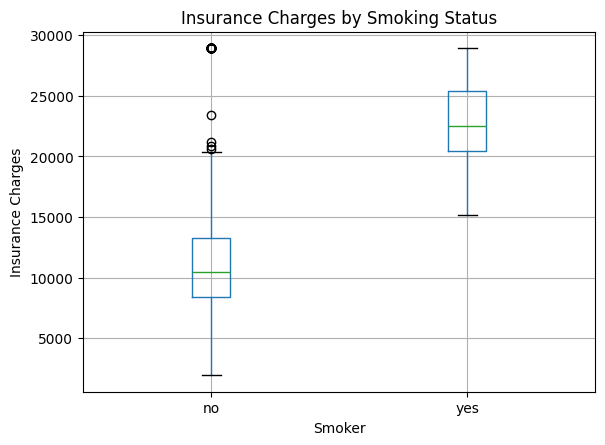

In [35]:
plt.figure()
df.boxplot(column='insurance_charges', by='smoker')
plt.title("Insurance Charges by Smoking Status")
plt.suptitle("")
plt.xlabel("Smoker")
plt.ylabel("Insurance Charges")
plt.show()

The boxplot clearly shows that smokers incur significantly higher insurance charges compared to non-smokers. The median cost for smokers is substantially higher, indicating smoking is a major risk factor influencing medical expenses. This suggests smoking status is one of the strongest predictors of insurance charges.

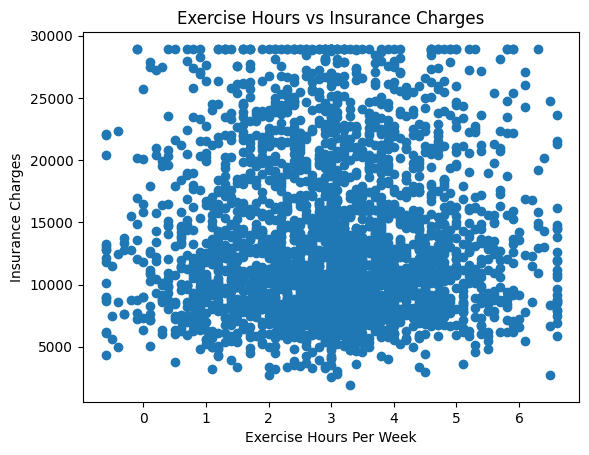

In [36]:
plt.figure()
plt.scatter(df['exercise_hours_per_week'], df['insurance_charges'])
plt.title("Exercise Hours vs Insurance Charges")
plt.xlabel("Exercise Hours Per Week")
plt.ylabel("Insurance Charges")
plt.show()

The scatter plot suggests a weak relationship between exercise hours per week and insurance charges. While lower physical activity may slightly contribute to higher medical costs, exercise alone does not strongly explain cost variation. This indicates that lifestyle factors interact with other health indicators rather than acting independently.

In [21]:
# =========================
# 8. TRAIN - TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# =========================
# PREPROCESSING PIPELINE
# =========================
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])


In [23]:
# =========================
# 9. APPLY ALL REGRESSION WITH HYPERPARAMETER TUNING
# =========================

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoost": GradientBoostingRegressor()
}

params = {
    "Ridge": {"model__alpha":[0.1,1,10]},
    "Lasso": {"model__alpha":[0.01,0.1,1]},
    "ElasticNet": {"model__alpha":[0.01,0.1,1], "model__l1_ratio":[0.2,0.5,0.8]},
    "RandomForest": {"model__n_estimators":[100,200], "model__max_depth":[5,10,None]},
    "GradientBoost": {"model__n_estimators":[100,200], "model__learning_rate":[0.01,0.1]}
}

best_models = {}
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    if name in params:
        grid = GridSearchCV(pipe, params[name], cv=5, scoring="r2", n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
    else:
        pipe.fit(X_train, y_train)
        best_models[name] = pipe


In [25]:
# =========================
# 10. PREDICTION ON EACH MODEL
# =========================
predictions = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


In [26]:
# =========================
# 11. EVALUATION METRICS
# =========================
for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, r2, mae, rmse])
    
results_df = pd.DataFrame(results, columns=["Model","R2","MAE","RMSE"])
print(results_df.sort_values(by="R2", ascending=False))


           Model        R2          MAE         RMSE
5  GradientBoost  0.879570  1693.779650  2148.904797
4   RandomForest  0.872306  1743.397187  2212.761589
3     ElasticNet  0.817918  1863.719977  2642.309071
2          Lasso  0.817850  1864.206823  2642.798618
1          Ridge  0.817844  1864.608501  2642.841472
0         Linear  0.817818  1864.919581  2643.033813


Gradient Boosting achieved the highest R² score of 0.879, indicating strong predictive performance. It also produced the lowest MAE and RMSE, making it the most accurate model among those tested.

Linear models such as Ridge, Lasso, and ElasticNet showed similar performance but lower accuracy, suggesting that insurance cost prediction involves non-linear relationships that linear models cannot fully capture.

Tree-based ensemble models performed better due to their ability to model complex interactions between health indicators, lifestyle variables, and risk factors.

In [42]:
# =========================
# 12. BEST MODEL SELECTION
# =========================
best_model_name = results_df.sort_values(by="R2", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]
print("Best Model:", best_model_name)


Best Model: GradientBoost


💼 Business Insights

Smoking status strongly influences insurance charges.

Hospital visits and BMI have moderate impact.

Insurance pricing should consider risk segmentation.

Predictive modeling can help reduce underwriting uncertainty.

Gradient Boosting can be used to assist premium pricing strategy.

In [38]:
# =========================
# 13. GRADIO OUTPUT APP (FIXED)
# =========================

def predict_cost(age, bmi, children, gender, smoker, region, annual_income,
                 policy_type, pre_existing_disease, hospital_visits_last_year,
                 exercise_hours_per_week, alcohol_consumption_per_week,
                 cholesterol_level, blood_pressure):

    input_df = pd.DataFrame({
        "age":[age],
        "bmi":[bmi],
        "children":[children],
        "gender":[gender],
        "smoker":[smoker],
        "region":[region],
        "annual_income":[annual_income],
        "policy_type":[policy_type],
        "pre_existing_disease":[pre_existing_disease],
        "hospital_visits_last_year":[hospital_visits_last_year],
        "exercise_hours_per_week":[exercise_hours_per_week],
        "alcohol_consumption_per_week":[alcohol_consumption_per_week],
        "cholesterol_level":[cholesterol_level],
        "blood_pressure":[blood_pressure]
    })

    pred = best_model.predict(input_df)[0]
    return f"Predicted Insurance Cost: ₹{round(pred,2)}"


interface = gr.Interface(
    fn=predict_cost,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Children"),
        gr.Dropdown(["male","female"], label="Gender"),
        gr.Dropdown(["yes","no"], label="Smoker"),
        gr.Dropdown(["northeast","northwest","southeast","southwest"], label="Region"),
        gr.Number(label="Annual Income"),
        gr.Dropdown(["basic","premium","gold"], label="Policy Type"),
        gr.Dropdown(["yes","no"], label="Pre Existing Disease"),
        gr.Number(label="Hospital Visits Last Year"),
        gr.Number(label="Exercise Hours Per Week"),
        gr.Number(label="Alcohol Consumption Per Week"),
        gr.Number(label="Cholesterol Level"),
        gr.Number(label="Blood Pressure")
    ],
    outputs="text",
    title="Medical Insurance Cost Prediction"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
